# 深度学习入门：基于Python的理论与实现

## Chap1: Python入门

### Matplotlib的使用

#### Sin函数曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0, 6, 0.1) # 以0.1为单位，生成0到6的数据
y = np.sin(x)

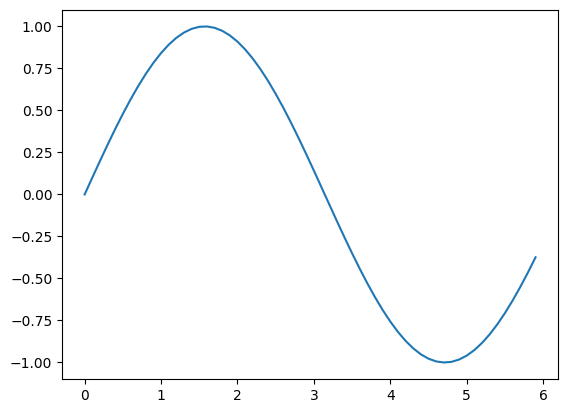

In [3]:
plt.plot(x, y)
plt.show()

#### Sin/Cos函数曲线

In [4]:
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

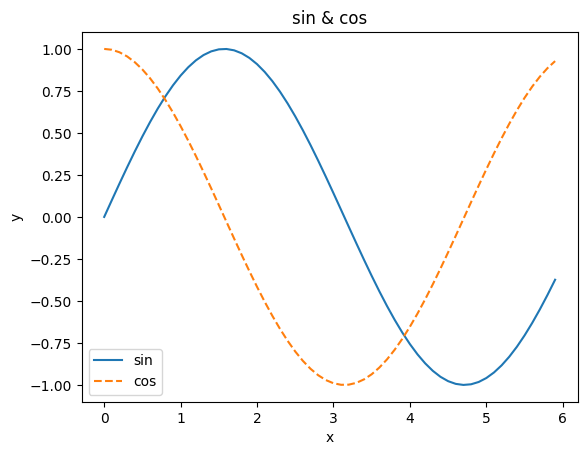

In [5]:
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle="--", label="cos") # 虚线
plt.xlabel("x") # x轴标签
plt.ylabel("y") # y轴标签
plt.title("sin & cos") # 标题
plt.legend()
plt.show()

#### 显示图片

In [6]:
from matplotlib.image import imread
from PIL import Image
from io import BytesIO
import requests

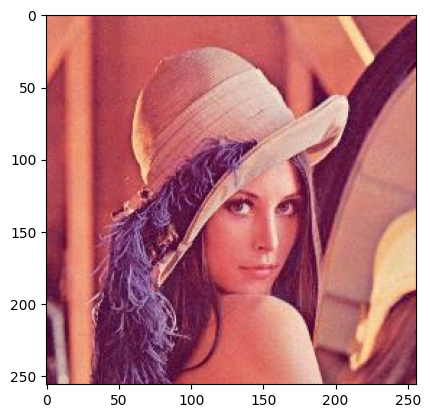

In [7]:
# imread("local_image_file")
url = "https://static.cyub.vip/images/202410/lena.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()

#### ReLU曲线

ReLU（Rectified Linear Unit）激活函数的曲线。ReLU函数定义为：

$$
f(x)=max⁡(0,x)
$$

这意味着当输入x小于0时，输出为0；当输入x大于或等于0时，输出为x的值。

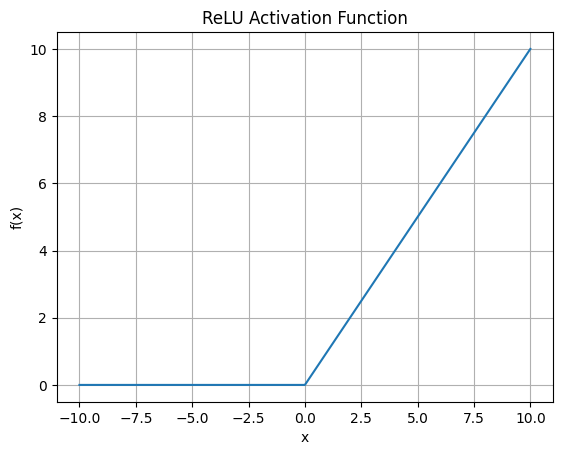

In [8]:
# 定义ReLU函数
def relu(x):
    return np.maximum(0, x)

# 生成x值
x = np.linspace(-10, 10, 1000)

# 计算ReLU函数的y值
y = relu(x)

# 绘制ReLU曲线
plt.plot(x, y)
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

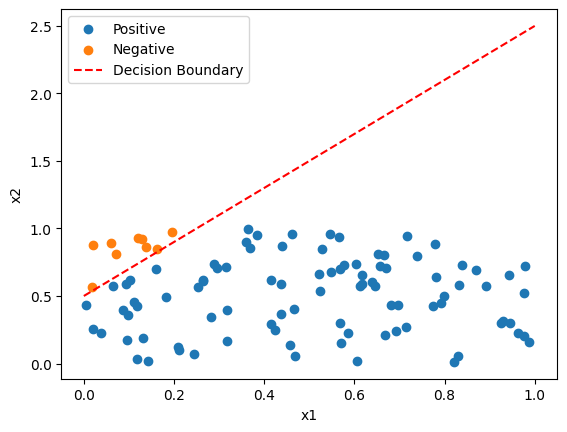

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(0)

# 生成随机数据
num_samples = 100
x1 = np.random.rand(num_samples)
x2 = np.random.rand(num_samples)

# 设置权重和偏置
w1 = 2
w2 = -1
b = 0.5

# 计算输出
y = np.where(w1*x1 + w2*x2 + b > 0, 1, 0)

# 绘制散点图
plt.scatter(x1[y==1], x2[y==1], label='Positive')
plt.scatter(x1[y==0], x2[y==0], label='Negative')

# 绘制决策边界
x_plot = np.linspace(0, 1, 100)
y_plot = -(w1/w2)*x_plot - b/w2
plt.plot(x_plot, y_plot, 'r--', label='Decision Boundary')

# 设置坐标轴标签和图例
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# 显示图像
plt.show()

## Chap2: 感知机

感知机（perceptron）是由美国学者 Frank Rosenblatt 在 1957 年提出来的。感知机接收多个输入信号，输出一个信号。

下图中是一个接收两个输入信号的感知机的例子。x1、x2 是输入信号，y 是 输 出 信 号，w1、w2 是 权 重（w 是 weight 的 首 字 母）。图 中 的 ○ 称 为“神经元”或者“节点”。输入信号被送往神经元时，会被分别乘以固定的权重（w1x1、w2x2）。神经元会计算传送过来的信号的总和，只有当这个总和超过了某个界限值时，才会输出 1。这也称为“神经元被激活”。这里将这个界限值称为**阈值**，用符号 θ 表示。

感知机的多个输入信号都有各自固有的权重，这些权重发挥着控制各个信号的重要性的作用。也就是说，权重越大，对应该权重的信号的重要性就越高。

数学公式：

$$
f(x)=
\begin{cases}
0 &&(w_1 x_1 + w_2 x_2) \le \theta\\\\
1 &&(w_1 x_1 + w_2 x_2) \gt \theta
\end{cases}
$$

![](https://static.cyub.vip/images/202410/perceptron.jpg)

### 简单逻辑电路

#### 与门

与门(AND gate)仅在两个输入均为 1 时输出 1，其他时候则输出 0。输入信号和输出信号的对应表称为“真值表。与门的真值表：

$x_1$ | $x_2$ | $y$
--- | --- | ---
0 | 0 | 0
1 | 0 | 0
0 | 1 | 0
1 | 1 | 1

如果用感知机来实现上面的与门，其中$w1$, $w2$, $\theta$的可能取值有：

(0.5, 0.5, 0.7)

(0.5, 0.5, 0.8)

等无穷多。

#### 与非门

与非门（NAND gate）就是颠倒了与门的输出。。NAND 是 Not AND 的意思。

$x_1$ | $x_2$ | $y$
--- | --- | ---
0 | 0 | 1
1 | 0 | 1
0 | 1 | 1
1 | 1 | 0

#### 或门

或门是“只要有一个输入信号是 1，输出就为 1”的逻辑电路。

$x_1$ | $x_2$ | $y$
--- | --- | ---
0 | 0 | 0
1 | 0 | 1
0 | 1 | 1
1 | 1 | 1

### 感知机实现

In [10]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1

In [11]:
AND(0, 0), AND(1, 0), AND(1, 0), AND(1, 1)

(0, 0, 0, 1)

#### 权重与偏置

将$\theta$换成 $-b$之后，我们可以得到以下数学公式：

$$
f(x)=
\begin{cases}
0 &&(b + w_1 x_1 + w_2 x_2) \le 0\\\\
1 &&(b + w_1 x_1 + w_2 x_2) \gt 0
\end{cases}
$$

虽然有一个符号不同，但表达的内容是完全相同的。此处，b 称为**偏置**，w1 和 w2 称为**权重**。感知机会计算输入信号和权重的乘积，然后加上偏置，如果这个值大于 0 则输出 1，否则输出 0。w1 和 w2 是控制输入信号的重要性的参数，而偏置是调整神经元被激活的容易程度（输出信号为 1 的程度）的参数。

我们可以把偏置当做成权重为b的输入信号1：

![](https://static.cyub.vip/images/202410/image00210.jpg)

In [12]:
import numpy as np
x = np.array([0, 1]) # 输入
w = np.array([0.5, 0.5]) # 权重
b = -0.7 # 偏置
np.sum(x * w)

np.float64(0.5)

In [13]:
np.sum(x * w) + b

np.float64(-0.19999999999999996)

#### 基于权重和偏置的实现

In [14]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp<=0:
        return 0
    else:
        return 1

In [15]:
AND(0, 0), AND(1, 0), AND(1, 0), AND(1, 1)

(0, 0, 0, 1)

In [16]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [17]:
NAND(0, 0), NAND(1, 0), NAND(1, 0), NAND(1, 1)

(1, 1, 1, 0)

In [18]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [19]:
OR(0, 0), OR(1, 0), OR(1, 0), OR(1, 1)

(0, 1, 1, 1)

### 感知机的局限性

感知机是无法实现这个异或门的。

#### 异或门

异或门（XOR gate）也被称为逻辑异或电路。仅当 $x_1$ 或 $x_2$ 中的一方为1 时，才会输出 1。异或门的真值表：

$x_1$ | $x_2$ | $y$
--- | --- | ---
0 | 0 | 0
1 | 0 | 1
0 | 1 | 1
1 | 1 | 0

### 多层感知机

感知机可以通过多层叠加实现异或门。下面是与门、与非门、或门的逻辑符号。

![](https://static.cyub.vip/images/202410/logic_gate.jpg)

下面是通过组合与门、与非门、或门来实现异或门：

![](https://static.cyub.vip/images/202410/xor_gate.jpg)

In [20]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [21]:
XOR(0, 0), XOR(1, 0), XOR(1, 0), XOR(1, 1)

(0, 1, 1, 0)

从上面可以看到与门、或门是单层感知机，而异或门是 2 层感知机。叠加了多层的感知机也称为**多层感知机（multi-layered perceptron）**。下图使用感知机表示异或门：

该图中感知机总共由 3 层构成，但是因为拥有权重的层实质上只有 2 层（第 0 层和第 1 层之间，第 1 层和第 2 层之间），所以称为“2 层感知机”。不过，有的文献认为图 2-13 的感知机是由 3 层构成的，因而将其称为“3 层感知机”

![](https://static.cyub.vip/images/202410/xor_gate_perceptron.jpg)

## Chap3 神经网络

感知机的局限性：

即便是计算机进行的复杂处理，感知机（理论上）也可以将其表示出来。坏消息是，设定权重的工作，即确定合适的、能符合预期的输入与输出的权重，现在还是由人工进行的。

### 神经网络例子

神经网络中最左边的一列称为输入层，最右边的一列称为输出层，中间的一列称为中间层。中间层有时也称为隐藏层。“隐藏”一词的意思是，隐藏层的神经元（和输入层、输出层不同）肉眼看不见。我们把输入层到输出层依次称为第 0 层、第1 层、第 2 层。下面图中是3层神经元构成，因为只有2层神经元有权重，因此将其称为”2层网络“，但有些会根据构成网络的层数，把它称为”3层网络“。

![](https://static.cyub.vip/images/202410/image00206.jpg)


### 激活函数

$$
y =
\begin{cases}
0 && (b + w_1 x_1 + w_2 x_2) \le 0\\\\
1 &&(b + w_1 x_1 + w_2 x_2) + b \gt 0
\end{cases}
$$

将上面感知机函数进行简化：

$$
a = b + w_1 x_1 + w_2 x_2
$$

$$
y = h(a)
$$

其中$b + w_1 x_1 + w_2 x_2$是输入信号总和，可以看出一个整体$x$，进一步简化：

$$
y = 
h(x) =
\begin{cases}
0 && x \le 0\\\\
1 && x \gt 0
\end{cases}
$$

上面公式中x是输入信号的总和，y输出信号。函数 $h(x)$ 称为**激活函数（activation function）**。激活函数用于将将输入信号的总和转换为输出信号，它决定了如何来激活输入信号的总和。


**神经元经过激活函数的过程：**

信号的加权总和为节点 a(节点即神经元），然后节点 a 被激活函数 $h()$ 转换成节点 y

![](https://static.cyub.vip/images/202410/image00214.jpg)

上面的激活函数 $h(x)$ 是一个 **阶跃函数**。阶跃函数指的是以阈值为界，一旦输入超过阈值，就切换输出。

#### 阶跃函数

##### 阶跃函数实现

In [22]:
# 建议版本阶跃函数实现：只支持浮点数
def setp_function(x):
    if x > 0:
        return 1
    else:
        return 0

# 进阶版本阶跃函数：支持Numpy数组
def step_funcion(x):
    y = x > 0
    return y.astype(int) # 原书中是np.int，现在已放弃了

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [23]:
y = x > 0
y

array([False,  True,  True])

In [24]:
y.astype(int)

array([0, 1, 1])

##### 阶跃函数图形

In [25]:
def step_function(x):
        return np.array(x >0, dtype=int)

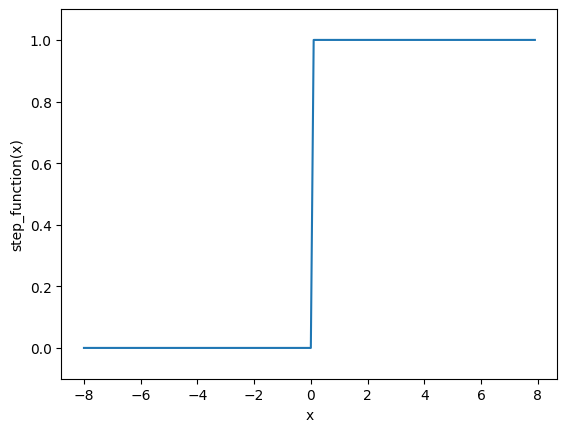

In [26]:
def step_function_img():
    x = np.arange(-8.0, 8.0, 0.1)
    y = step_function(x)
    plt.plot(x, y)
    plt.ylim(-0.1, 1.1)
    plt.xlabel('x')
    plt.ylabel('step_function(x)')
    # plt.grid(True)
    plt.show()

step_function_img()

#### sigmoid函数

$$
$$
\begin{aligned}
h(x) \ \  & = \ \ 
\frac{1}{1\ \ \ \ +  \ \ \ \ exp(-x)} \\ \\
&= \frac{1}{1\ \ \ \ + \ \ \ \ e^{-x}}
\end{aligned}
$$
$$

上面公式中$exp(-x)表示$e^{-x}$，其中e是纳皮尔常数。

##### sigmod函数实现

In [27]:
# sigmoid函数实现
def sigmoid(x):
    return 1/(1 + np.exp(-x))

##### sigmoid函数图形

In [28]:
# sigmoid函数 测试
x = np.array([-1, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

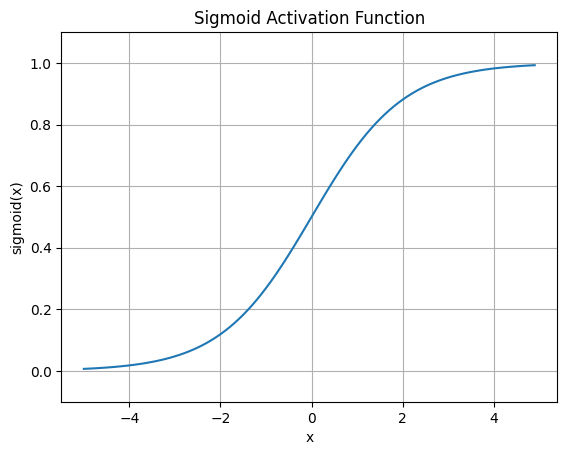

In [29]:
def sigmoid_img():
    x = np.arange(-5.0, 5.0, 0.1)
    y = sigmoid(x)
    plt.plot(x, y)
    plt.ylim(-0.1, 1.1) # 指定y轴范围
    # plt.title("sigmoid function")
    plt.title('Sigmoid Activation Function')
    plt.xlabel('x')
    plt.ylabel('sigmoid(x)')
    plt.grid(True)
    plt.show()

# sigmoid 函数图像
sigmoid_img()

##### 阶跃函数与sigmoid函数比较

阶跃函数和 sigmoid函数虽然在平滑性上有差异，但是如果从宏观视角，可以发现**它们具有相似的形状**， **它们都是非线性函数**。实际上，两者的结构均是“输入小时，输出接近 0（为 0）；随着输入增大，输出向 1 靠近（变成 1）”。也就是说，当输入信号为重要信息时，阶跃函数和 sigmoid 函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值。还有一个共同点是，不管输入信号有多小，或者有多大，**输出信号的值都在 0 到 1 之间**。

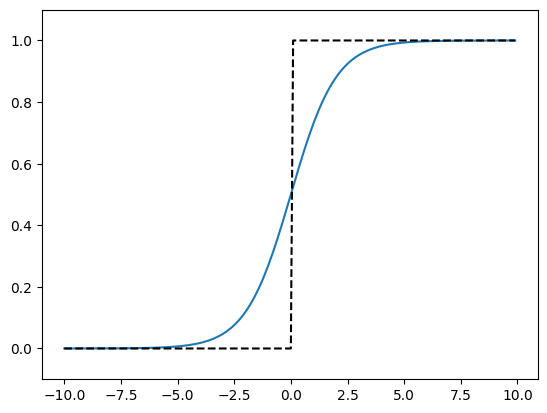

In [30]:
x = np.arange(-10.0, 10.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #指定图中绘制的y轴的范围
plt.show()

##### 神经网络的激活函数为什么不能使用线性函数？

线性函数的问题在于，不管如何加深层数，总是存在与之等效的“无隐 藏 层 的 神 经 网 络”。这 里 我 们 考 虑 把 线 性 函 数 $h(x) = cx$ 作 为 激 活函 数，把 $y(x) = h(h(h(x)))$ 的 运 算 对 应 3 层 神 经 网 络 A。这 个 运 算 会 进 行 $y(x) = c × c × c × x$ 的乘法运算，但是同样的处理可以由 $y(x) = ax$（注意，$a = c^3$）这一次乘法运算（即没有隐藏层的神经网络）来表示。可以看到，使用线性函数时，无法发挥多层网络带来的优势。

#### ReLU函数

ReLU 函数在输入大于 0 时，直接输出该值；在输入小于等于 0 时，输出 0。ReLU 函数可以表示为下面的式：

$$
h(x) =
\begin{cases}
x && (x \gt 0)\\\\
0 && (x \le 0)
\end{cases}
$$

##### ReLu函数实现

In [31]:
def ReLu(x):
    return np.maximum(0, x)

##### ReLu函数图形

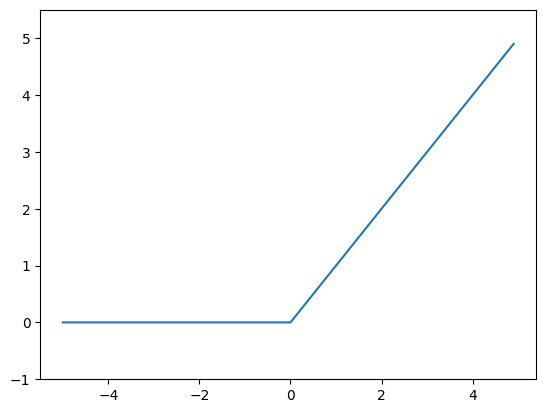

In [32]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### 多维数组的运算

数字排成一列的集合、排成长方形的集合、排成三维状或者（更加一般化的）N 维状的集合都称为 **多维数组**。对于二维数组，也成为矩阵（matrix），也有称为张量。

In [33]:
import numpy as np

A = np.array([1, 2, 3, 4]) # 一维数组
print(A) # 打印数组A

print(np.ndim(A)) # 打印数组A维度

print(A.shape) # 打印数组A形状，由于A是一维数组，所以元祖的第二个元素为空。

[1 2 3 4]
1
(4,)


In [34]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [35]:
np.ndim(B)

2

In [36]:
B.shape # 3是B的第0维，2是B的第二维

(3, 2)

#### 矩阵的乘法

矩阵的乘法(也叫乘积，也称为点积）是通过左边矩阵的行（横向）和右边矩阵的列（纵向）以对应元素的方式相乘后再求和而得到的。

对于矩阵A 和 矩阵 B的乘法：

$$
\left\{ \begin{matrix} 1 & 2 \\ 3 & 4 \end{matrix} \right\} 
\times 
\left\{ \begin{matrix} 5 & 6 \\ 7 & 8 \end{matrix} \right\} 
=
\left\{ \begin{matrix} 
(1 \times 5 + 2 \times 7) & (1 \times 6 + 2 \times 8) \\ 
(3 \times 5 + 4 \times 7) & (3 \times 6 + 4 \times 8) 
\end{matrix} \right\} 
=
\left\{ \begin{matrix} 
19 & 22 \\ 
43 & 50 
\end{matrix} \right\}
$$

可以用下图表示：


![](https://static.cyub.vip/images/202410/image00225.jpg)

从上面可以看到： A 的第 1 行和 B 的第 1 列的乘积结果是新数组的第 1 行第 1 列的元素，A 的第 2 行和 B 的第 1 列的结果是新数组的第 2 行第 1列的元素。Python 代码实现：

In [37]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [38]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [39]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

矩阵 A与矩阵 B计算时候必须满足**矩阵 A 的第 1 维的元素个数（列数）必须和矩阵 B 的第 0 维的元素个数（行数）相等**。即使其中一个是一维数组，也要保持一致。

下图中(3 x 2) x (2 x 4)是可以进行乘积运算的：

![](https://static.cyub.vip/images/202410/image00229.jpg)

In [40]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [41]:
B = np.array([[7,8,9,10],[11, 12, 13, 14]])
B.shape

(2, 4)

In [42]:
np.dot(A, B)

array([[ 29,  32,  35,  38],
       [ 65,  72,  79,  86],
       [101, 112, 123, 134]])

下图中(3 x 2) x (2) 也是可以进行乘积运算的：

![](https://static.cyub.vip/images/202410/image00230.jpg)

In [43]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [44]:
B = np.array([7, 8])
B.shape

(2,)

In [45]:
np.dot(A, B)

array([23, 53, 83])

##### 神经网络的内积

下图演示了神经网络的乘积运算(只考虑了权重，忽略了偏置和激活函数）：



![](https://static.cyub.vip/images/202410/image00231.jpg)

In [46]:
X = np.array([1, 2])
X.shape

(2,)

In [47]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)

[[1 3 5]
 [2 4 6]]
(2, 3)


In [48]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

### 3层神经网络的实现

下面是三层神经网络图：

记住本书中输入层不算入层数中（因为考虑到实现，它没有权重）。

![](https://static.cyub.vip/images/202410/image00235.jpg)

#### $w_{1\ \ 2}^{(1)}$ 与 $a_1^{(1)}$、$b_1^{(1)}$ 符号引入

 $a_1^{(1)}$表示第一层第一个神经元的值，$a$左上角的括号中数字表示层数，右小角数字表示当前层数第几个神经元。$b_1^{(1)}$表示第一层第一个神经元的偏置值。$w_{1\ \ 2}^{(1)}$表示表示前一层的第 2 个神经元 $x_2$ 到后一层的第 1 个神经元（对应就是$a_1^{(1)}$）的权重。

![](https://static.cyub.vip/images/202410/image00238.jpg)

#### 各层间信号传递的实现

从输入层到第 1 层的信号传递：

![](https://static.cyub.vip/images/202410/image00239.jpg)

对于第一个神经单元的值计算公式：

$$
a_1^{(1)} = w_{1\ 1}^{(1)}x_1\ \ + \ \ w_{1\ 2}^{(1)}x_2\ \ + \ \ b_1^{(1)}
$$

推而广之第一层的计算公式：

$$
\mathbf{\mathit{A}}^{(1)} \ \ =  \ \ \mathbf{\mathit{X}}\mathbf{\mathit{W}}^{(1)}\ \ \   +  \ \  \mathbf{\mathit{B}}^{(1)}
$$

其中：
$$
\begin{aligned}
\mathbf{\mathit{A}}^{(1)} \ \ &= \left\{ \begin{matrix} a_1^{(1)} & a_2^{(2)} & a_3^{(1)}  \end{matrix} \right\} \\ \\
\mathbf{\mathit{X}} \ \ &= \left\{ \begin{matrix} x_1 & x_2 \end{matrix} \right\}\\ \\
\mathbf{\mathit{B}}^{(1)} \ \ &= \left\{ \begin{matrix} b_1^{(1)} & b_2^{(1)} & b_3^{(1)} \end{matrix} \right\}\\ \\
\mathbf{\mathit{W}}^{(1)} \ \ &= \left\{ \begin{matrix} w_{1\ 1}^{(1)} & w_{2\ 1}^{(1)}  & w_{3\ 1}^{(1)} \\ w_{1\ 2}^{(1)} & w_{2\ 2}^{(1)}  & w_{3\ 2}^{(1)} \end{matrix} \right\}
\end{aligned}
$$

展开后等于：

$$
\begin{aligned}
\mathbf{\mathit{A}}^{(1)} \ \ &=  \ \ \mathbf{\mathit{X}}\mathbf{\mathit{W}}^{(1)}\ \ \   +  \ \  \mathbf{\mathit{B}}^{(1)}\\
&= \left\{ \begin{matrix} x_1 & x_2  \end{matrix} \right\} 
\times 
\left\{ \begin{matrix} w_{1\ 1}^{(1)} & w_{2\ 1}^{(1)}  & w_{3\ 1}^{(1)} \\ w_{1\ 2}^{(1)} & w_{2\ 2}^{(1)}  & w_{3\ 2}^{(1)} \end{matrix} \right\} 
+
\left\{ \begin{matrix} b_1^{(1)} & b_2^{(1)} & b_3^{(1)} \end{matrix} \right\} 
\end{aligned}
$$

In [49]:
### 传输层到第一层的信号传递实现

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2 , 0.3]) # 偏置的数量取决于后一层的神经元的数量

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
A1

(2,)
(2, 3)
(3,)


array([0.3, 0.7, 1.1])

In [50]:
Z1 = sigmoid(A1)  # 激活函数处理
Z1

array([0.57444252, 0.66818777, 0.75026011])

**带激活函数的输入层到第一层的信号传递**：

![](./dataset/image00246.jpg)

In [51]:
## 第1层到第2层的信号传递

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
A2

(3,)
(3, 2)
(2,)


array([0.51615984, 1.21402696])

In [52]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

第1 层到第2 层的示意图：

![](https://static.cyub.vip/images/202410/image00247.jpg)

In [53]:
## 第2层到输出层的信号传递实现

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
print(A3)

Y = identity_function(A3) # 或者 Y = A3

[0.31682708 0.69627909]


第二次到输出层的示意图：

注意此时输出层的激活函数用 $\sigma()$（读sigma)表示。不同于隐藏层的激活 $h()$。另外使用恒等函数$identity_functon()$作为了激活函数，目的是为了将输入按照原样输出。

![](https://static.cyub.vip/images/202410/image00248.jpg)

In [54]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x): # forward（前向）一词，它表示的是从输入到输出方向的传递处理
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y
    
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y # [ 0.31682708 0.69627909]

array([0.31682708, 0.69627909])

#### 输出层的设计

神经网络可以用来解决 **分类问题**和 **回归问题** 上（即定性问题与定量问题）。分类问题是数据属于哪一个类别的问题。比如，区分图像中的人是男性还是女性
的问题就是分类问题。而回归问题是根据某个输入预测一个（连续的）数值的问题。比如，根据一个人的图像预测这个人的体重的问题就是回归问题（类似“57.4kg”这样的预测）。

一般而言，回归问题用恒等函数，分类问题用 softmax 函数。